In [586]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [587]:
#Define the matrix I
I = np.array([
    [3, 1, 4, 4, 2, 3],
    [3, 2, 2, 0, 5, 1],
    [1, 2, 3, 1, 0, 1],
    [4, 1, 0, 2, 4, 4],
    [3, 1, 0, 1, 0, 1],
    [2, 1, 3, 2, 1, 3]
])
# Calculate total pixels
total_pixels = I.size

# Print the total pixels
print(f"Total pixels: {total_pixels}")

Total pixels: 36


In [588]:
flattened = I.flatten() #Flatten the matrix

In [589]:
freq = Counter(flattened) #counter the frequency of each unique value

In [590]:
#Create a table for g and h(g)
table = pd.DataFrame(list(freq.items()), columns=['g', 'h(g)'])
table = table.sort_values(by='g').reset_index(drop=True)

In [591]:
#Display the table
print("Table of g and h(g):")
print(table)

Table of g and h(g):
   g  h(g)
0  0     5
1  1    11
2  2     7
3  3     7
4  4     5
5  5     1


In [592]:
P_g = {k: f / total_pixels for k, f in freq.items()} #Calculate total probability distribution

In [593]:
# Create a DataFrame with g, h(g), and P(g) 
table = pd.DataFrame({
    'g': list(freq.keys()),
    'h(g)': list(freq.values()),
    'P(g)': list(P_g.values())
})

In [594]:
# Sort the table by g
table = table.sort_values(by='g').reset_index(drop=True)

In [595]:
# Print the table
print(table)

   g  h(g)      P(g)
0  0     5  0.138889
1  1    11  0.305556
2  2     7  0.194444
3  3     7  0.194444
4  4     5  0.138889
5  5     1  0.027778


In [596]:
#Calculate Cumulative distribution function(CDF)
CDF = {}
cumulative = 0
for g in sorted(P_g.keys()):
    cumulative += P_g[g]
    CDF[g] = cumulative

In [597]:
# Add the CDF column
table['CDF(g)'] = table['P(g)'].cumsum()

In [598]:
# Display the updated table
print(table)

   g  h(g)      P(g)    CDF(g)
0  0     5  0.138889  0.138889
1  1    11  0.305556  0.444444
2  2     7  0.194444  0.638889
3  3     7  0.194444  0.833333
4  4     5  0.138889  0.972222
5  5     1  0.027778  1.000000


In [599]:
#Map intensities using s_g = round((L-1) * CDF(g))
L = 6  # Number of gray levels
mapping = {g: round((L - 1) * CDF[g]) for k in CDF.keys()}

In [600]:
# Add the s(g) column by applying the mapping
table['s(g)'] = table['g'].apply(lambda g: round((L - 1) * CDF[g]))

In [601]:
# Display the updated table
print(table)

   g  h(g)      P(g)    CDF(g)  s(g)
0  0     5  0.138889  0.138889     1
1  1    11  0.305556  0.444444     2
2  2     7  0.194444  0.638889     3
3  3     7  0.194444  0.833333     4
4  4     5  0.138889  0.972222     5
5  5     1  0.027778  1.000000     5


In [602]:
g_to_cdf_sg_mapping = []

for g in sorted(P_g.keys()):  # Iterate over all unique g
    cdf_value = CDF[g]  # Retrieve the CDF value for this g
    s_g = round((L - 1) * cdf_value)  # Calculate the equalized value s(g)
    g_to_cdf_sg_mapping.append({'g': g, 'CDF(g)': cdf_value, 's(g)': s_g})
    

mapping_table = pd.DataFrame(g_to_cdf_sg_mapping)
print("Mapping of g, CDF(g), and s(g):")
print(mapping_table)

Mapping of g, CDF(g), and s(g):
   g    CDF(g)  s(g)
0  0  0.138889     1
1  1  0.444444     2
2  2  0.638889     3
3  3  0.833333     4
4  4  0.972222     5
5  5  1.000000     5


In [603]:
#Need to map g and s(g) and update after mapping -> To create I equalized:
g_to_sg_mapping = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 5}
I_equalized = np.array([[g_to_sg_mapping[val] for val in row] for row in I])

In [604]:
# Print the original and equalized matrices
print("Original Matrix I:")
print(I)

print("Equalized Matrix I_equalized:")
print(I_equalized)

Original Matrix I:
[[3 1 4 4 2 3]
 [3 2 2 0 5 1]
 [1 2 3 1 0 1]
 [4 1 0 2 4 4]
 [3 1 0 1 0 1]
 [2 1 3 2 1 3]]
Equalized Matrix I_equalized:
[[4 2 5 5 3 4]
 [4 3 3 1 5 2]
 [2 3 4 2 1 2]
 [5 2 1 3 5 5]
 [4 2 1 2 1 2]
 [3 2 4 3 2 4]]


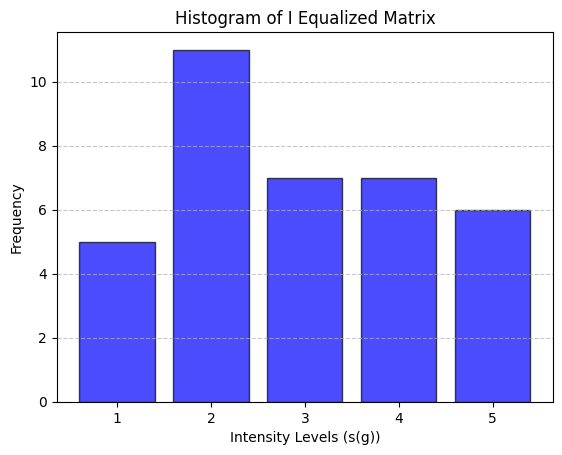

In [605]:
# Histogram for the equalized matrix
unique, counts = np.unique(I_equalized, return_counts=True)  # Get unique values and their frequencies

# Plot the histogram
plt.bar(unique, counts, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of I Equalized Matrix")
plt.xlabel("Intensity Levels (s(g))")
plt.ylabel("Frequency")
plt.xticks(unique)  # Ensure x-axis ticks show all intensity levels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()